<a href="https://colab.research.google.com/github/EsteArgen/Aspectos_Aritmeticos_Teoria_Ehrhart/blob/main/Construcci%C3%B3n_Gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Envolvente Convexa**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

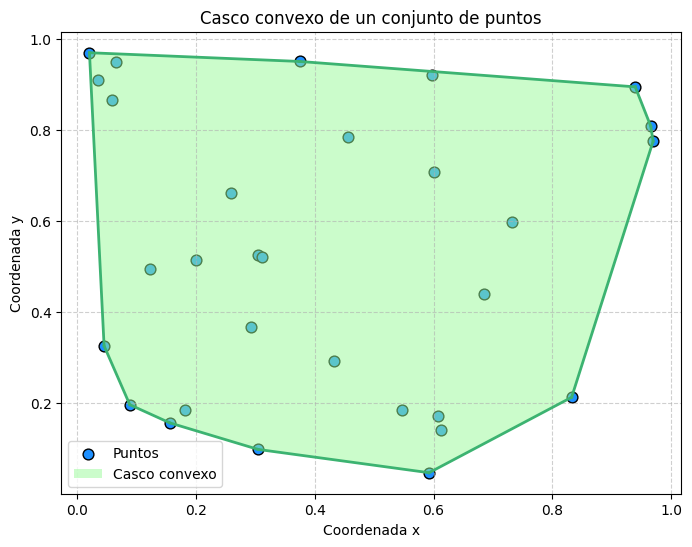

In [ ]:

# Generar puntos aleatorios
np.random.seed(42)
points = np.random.rand(30, 2)

# Calcular el casco convexo
hull = ConvexHull(points)

# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar todos los puntos
plt.scatter(points[:, 0], points[:, 1], c='dodgerblue', edgecolor='k', s=60, label='Puntos')

# Graficar el casco convexo
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'mediumseagreen', linewidth=2)

# Rellenar el casco convexo
plt.fill(points[hull.vertices, 0], points[hull.vertices, 1], 'palegreen', alpha=0.5, label='Casco convexo')

# Personalizar el gráfico
plt.title('Casco convexo de un conjunto de puntos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')

# Mostrar
plt.show()


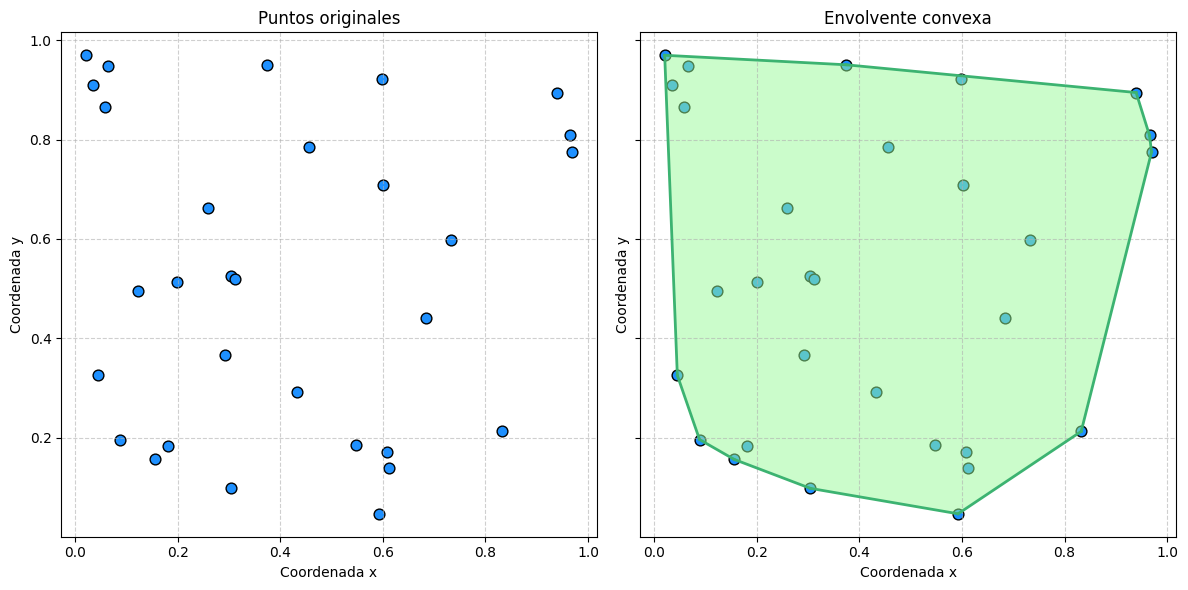

In [ ]:

# Generar puntos aleatorios
np.random.seed(42)
points = np.random.rand(30, 2)

# Calcular el casco convexo
hull = ConvexHull(points)

# Crear figura con dos subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# --- Subplot 1: Solo los puntos ---
ax[0].scatter(points[:, 0], points[:, 1], c='dodgerblue', edgecolor='k', s=60)
ax[0].set_title('Puntos originales')
ax[0].grid(True, linestyle='--', alpha=0.6)

# --- Subplot 2: Puntos y casco convexo ---
ax[1].scatter(points[:, 0], points[:, 1], c='dodgerblue', edgecolor='k', s=60)
for simplex in hull.simplices:
    ax[1].plot(points[simplex, 0], points[simplex, 1], 'mediumseagreen', linewidth=2)
ax[1].fill(points[hull.vertices, 0], points[hull.vertices, 1], 'palegreen', alpha=0.5)

ax[1].set_title('Envolvente convexa')
ax[1].grid(True, linestyle='--', alpha=0.6)

# Etiquetas generales
for axis in ax:
    axis.set_xlabel('Coordenada x')
    axis.set_ylabel('Coordenada y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# **Hiperplano**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

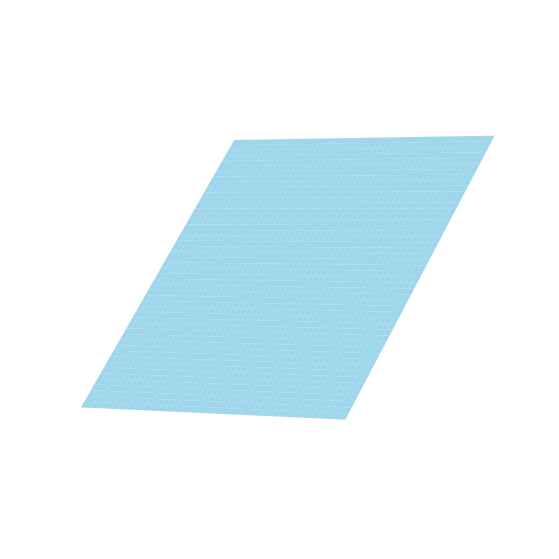

In [ ]:

# Definir el vector normal u y el escalar α
u = np.array([1, 2, -1])  # Vector normal al hiperplano
alpha = 3  # Constante

# Crear una malla de puntos (x, y) para parametrizar el plano
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

# Ecuación del plano: <x, u> = α
a, b, c = u
Z = (alpha - a*X - b*Y) / c

# Crear figura y eje 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar el plano
ax.plot_surface(X, Y, Z, color='skyblue', alpha=0.8, edgecolor='none')

# Eliminar ejes, etiquetas y cuadrícula
ax.set_axis_off()

# Mostrar el gráfico
plt.show()



# **Construcción Triángulos**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.path import Path
import matplotlib.patches as patches

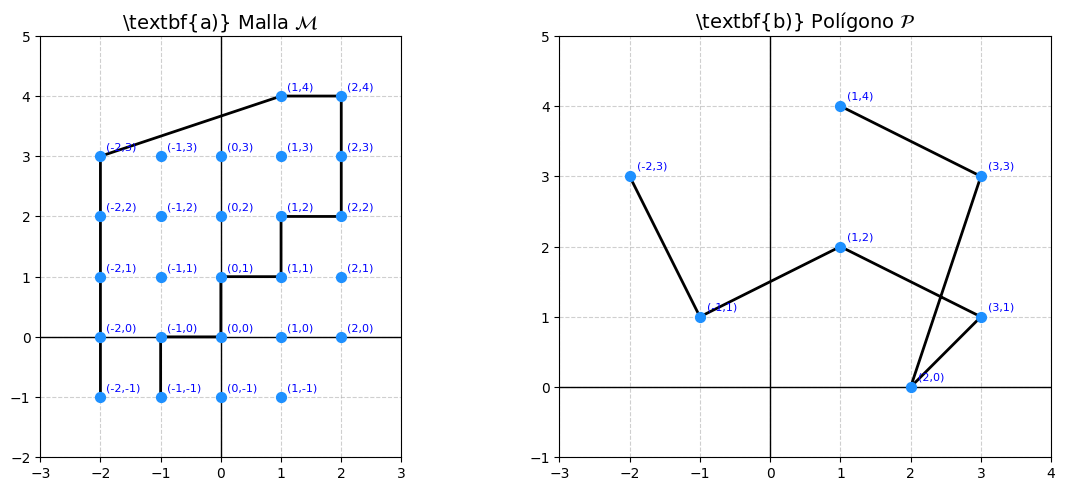

In [ ]:


# --- Definir la malla (puntos enteros dentro de un rango específico) ---
puntos_malla = np.array([
    (-2, -1), (-1, -1), (0, -1), (1, -1),
    (-2, 0), (-1, 0), (0, 0), (1, 0), (2, 0),
    (-2, 1), (-1, 1), (0, 1), (1, 1), (2, 1),
    (-2, 2), (-1, 2), (0, 2), (1, 2), (2, 2),
    (-2, 3), (-1, 3), (0, 3), (1, 3), (2, 3),
    (1, 4), (2, 4)
])

# --- Definir el polígono en la malla (envolvente convexa o H-politopo) ---
poligono_malla = np.array([
    (-2, -1), (-2, 3), (1, 4), (2, 4), (2, 2), (1, 2), (1, 1), (0, 1), (0, 0), (-1, 0), (-1, -1)
])

# --- Definir el polígono simple libre (polígono general V-politopo) ---
poligono_libre = np.array([
    (-2, 3), (-1, 1), (1, 2), (3, 1), (2, 0), (3, 3), (1, 4)
])

# --- Crear figura ---
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# === Subplot a) Malla con el polígono ===
ax[0].scatter(puntos_malla[:, 0], puntos_malla[:, 1], color='dodgerblue', zorder=3, s=50)

# Dibujar el polígono en la malla
ax[0].plot(poligono_malla[:, 0], poligono_malla[:, 1], color='black', linewidth=2)

# Etiquetar solo los puntos de la malla
for x, y in puntos_malla:
    ax[0].text(x+0.1, y+0.1, f'({x},{y})', fontsize=8, color='blue')

ax[0].set_title(r'\textbf{a)} Malla $\mathcal{M}$', fontsize=14)
ax[0].grid(True, linestyle='--', alpha=0.6)
ax[0].set_xlim(-3, 3)
ax[0].set_ylim(-2, 5)
ax[0].axhline(0, color='black', lw=1)
ax[0].axvline(0, color='black', lw=1)
ax[0].set_aspect('equal', adjustable='box')

# === Subplot b) Polígono simple libre ===
ax[1].scatter(poligono_libre[:, 0], poligono_libre[:, 1], color='dodgerblue', zorder=3, s=50)

# Dibujar el polígono libre
ax[1].plot(poligono_libre[:, 0], poligono_libre[:, 1], color='black', linewidth=2)

# Etiquetar vértices del polígono libre
for x, y in poligono_libre:
    ax[1].text(x+0.1, y+0.1, f'({x},{y})', fontsize=8, color='blue')

ax[1].set_title(r'\textbf{b)} Polígono $\mathcal{P}$', fontsize=14)
ax[1].grid(True, linestyle='--', alpha=0.6)
ax[1].set_xlim(-3, 4)
ax[1].set_ylim(-1, 5)
ax[1].axhline(0, color='black', lw=1)
ax[1].axvline(0, color='black', lw=1)
ax[1].set_aspect('equal', adjustable='box')

# Mostrar la figura
plt.tight_layout()
plt.show()


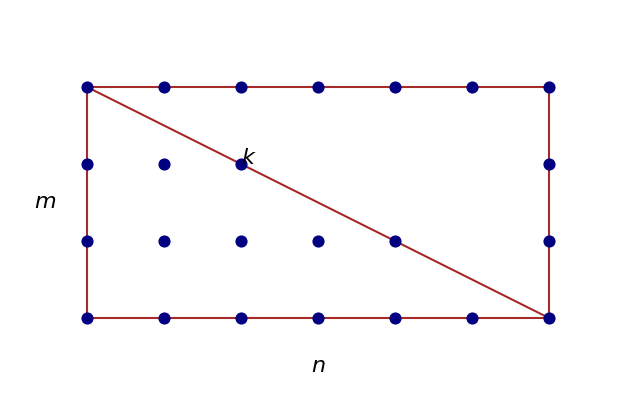

In [ ]:

# Dimensiones del rectángulo
m = 3  # Altura
n = 6  # Ancho

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 5))

# --- Dibujar el rectángulo (borde exterior) ---
rect_x = [0, n, n, 0, 0]
rect_y = [0, 0, m, m, 0]
ax.plot(rect_x, rect_y, color='brown', linewidth=1.5)

# --- Dibujar la diagonal ---
ax.plot([0, n], [m, 0], color='brown', linewidth=1.5)

# --- Dibujar puntos de lattice (solo borde y dentro del triángulo) ---
for x in range(n+1):
    for y in range(m+1):
        # Puntos en el borde
        if x == 0 or x == n or y == 0 or y == m:
            ax.scatter(x, y, color='navy', s=60, zorder=3)
        # Puntos dentro del triángulo (bajo la diagonal)
        elif y <= m - (m/n) * x:
            ax.scatter(x, y, color='navy', s=60, zorder=3)

# --- Etiquetas m, n, k ---
ax.text(-0.4, m/2, r'$m$', fontsize=16, va='center', ha='right', fontstyle='italic')
ax.text(n/2, -0.5, r'$n$', fontsize=16, ha='center', va='top', fontstyle='italic')
ax.text(n/3, 2*m/3, r'$k$', fontsize=16, fontstyle='italic')

# --- Configuración general ---
ax.set_xlim(-1, n+1)
ax.set_ylim(-1, m+1)
ax.set_xticks(range(n+1))
ax.set_yticks(range(m+1))
ax.grid(False)
ax.set_aspect('equal', adjustable='box')
ax.axis('off')

# Mostrar gráfico
plt.show()


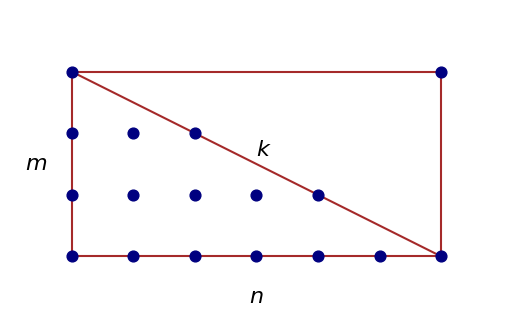

In [ ]:

# Dimensiones del rectángulo
m = 3  # Altura
n = 6  # Ancho

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 4))

# --- Dibujar el rectángulo (borde exterior) ---
rect_x = [0, n, n, 0, 0]
rect_y = [0, 0, m, m, 0]
ax.plot(rect_x, rect_y, color='brown', linewidth=1.5)

# --- Dibujar la diagonal ---
ax.plot([0, n], [m, 0], color='brown', linewidth=1.5)

# --- Dibujar puntos de lattice (solo borde izquierdo, inferior y dentro del triángulo, con esquinas completas) ---
for x in range(n+1):
    for y in range(m+1):
        # Puntos en el borde izquierdo o inferior o la esquina superior derecha
        if (x == 0 and y <= m) or (y == 0 and x <= n) or (x == n and y == m):
            ax.scatter(x, y, color='navy', s=60, zorder=3)
        # Puntos dentro del triángulo (bajo la diagonal)
        elif y <= m - (m/n) * x:
            ax.scatter(x, y, color='navy', s=60, zorder=3)

# --- Etiquetas m, n, k ---
ax.text(-0.4, m/2, r'$m$', fontsize=16, va='center', ha='right', fontstyle='italic')
ax.text(n/2, -0.5, r'$n$', fontsize=16, ha='center', va='top', fontstyle='italic')

# Centrar mejor la k (en la mitad de la diagonal)
ax.text(n/2, m - m/(2.2), r'$k$', fontsize=16, fontstyle='italic')

# --- Configuración general ---
ax.set_xlim(-1, n+1)
ax.set_ylim(-1, m+1)
ax.set_xticks(range(n+1))
ax.set_yticks(range(m+1))
ax.grid(False)
ax.set_aspect('equal', adjustable='box')
ax.axis('off')

# Mostrar gráfico
plt.show()


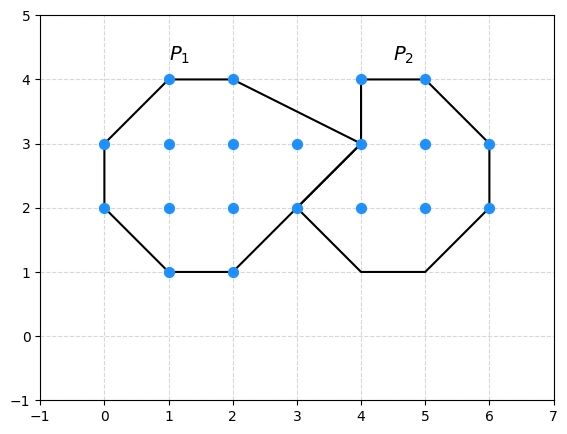

In [ ]:


# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 5))

# --- Definir vértices de los polígonos (octágonos) ---
P1 = np.array([
    (1, 1), (0, 2), (0, 3), (1, 4), (2, 4), (4, 3), (3, 2), (2, 1), (1, 1)
])

P2 = np.array([
    (3, 2), (4, 1), (5, 1), (6, 2), (6, 3), (5, 4), (4, 4), (4, 3), (3, 2)
])

# --- Crear paths (caminos) de los polígonos para detección de puntos ---
path1 = Path(P1)
path2 = Path(P2)

# --- Dibujar polígonos ---
ax.plot(P1[:, 0], P1[:, 1], color='black', linewidth=1.5)
ax.plot(P2[:, 0], P2[:, 1], color='black', linewidth=1.5)

# --- Dibujar solo puntos dentro o sobre el borde de P1 o P2 ---
for x in range(0, 10):
    for y in range(0, 5):
        point = (x, y)
        if path1.contains_point(point) or path2.contains_point(point) or \
           path1.contains_point(point, radius=-0.1) or path2.contains_point(point, radius=-0.1):
            ax.scatter(x, y, color='dodgerblue', s=50, zorder=3)

# --- Etiquetas de polígonos ---
ax.text(1, 4.3, r'$P_1$', fontsize=14)
ax.text(4.5, 4.3, r'$P_2$', fontsize=14)

# --- Configurar rejilla ---
ax.set_xticks(np.arange(-1, 10, 1))
ax.set_yticks(np.arange(-1, 6, 1))
ax.grid(True, linestyle='--', alpha=0.5)

# Ajustes visuales
ax.set_xlim(-1, 7)
ax.set_ylim(-1, 5)
ax.set_aspect('equal', adjustable='box')

# Mostrar figura
plt.show()



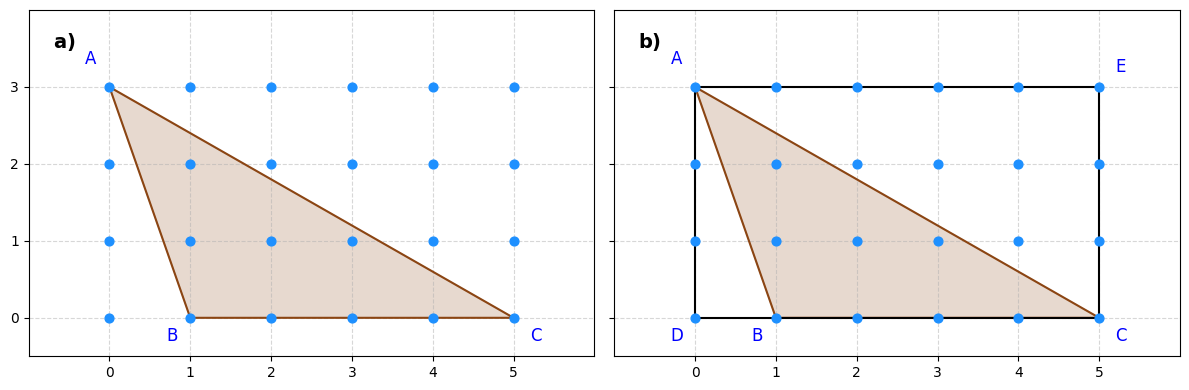

In [ ]:

# Crear figura y ejes (2 subplots)
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# --- Coordenadas de la malla lattice ---
x = np.arange(0, 6)
y = np.arange(0, 4)
X, Y = np.meshgrid(x, y)

# --- Definir vértices del triángulo ---
A = (0, 3)
B = (1, 0)
C = (5, 0)

# --- Subplot a: Triángulo solo ---
ax[0].scatter(X, Y, color='dodgerblue', s=40, zorder=3)
triangulo = np.array([A, B, C, A])
ax[0].plot(triangulo[:, 0], triangulo[:, 1], color='saddlebrown', linewidth=1.5)
ax[0].fill(triangulo[:, 0], triangulo[:, 1], color='saddlebrown', alpha=0.2)

# Etiquetas de vértices
ax[0].text(A[0]-0.3, A[1]+0.3, 'A', fontsize=12, color='blue')
ax[0].text(B[0]-0.3, B[1]-0.3, 'B', fontsize=12, color='blue')
ax[0].text(C[0]+0.2, C[1]-0.3, 'C', fontsize=12, color='blue')

# Etiqueta (a)
ax[0].text(-0.7, 3.5, r'$\mathbf{a)}$', fontsize=14)

# Configurar rejilla y límites
ax[0].set_xticks(x)
ax[0].set_yticks(y)
ax[0].grid(True, linestyle='--', alpha=0.5)
ax[0].set_xlim(-1, 6)
ax[0].set_ylim(-0.5, 4)

# --- Subplot b: Triángulo dentro de rectángulo ---
ax[1].scatter(X, Y, color='dodgerblue', s=40, zorder=3)
ax[1].plot(triangulo[:, 0], triangulo[:, 1], color='saddlebrown', linewidth=1.5)
ax[1].fill(triangulo[:, 0], triangulo[:, 1], color='saddlebrown', alpha=0.2)

# Dibujar rectángulo
rect_x = [0, 5, 5, 0, 0]
rect_y = [0, 0, 3, 3, 0]
ax[1].plot(rect_x, rect_y, color='black', linewidth=1.5)

# Etiquetas de vértices
ax[1].text(A[0]-0.3, A[1]+0.3, 'A', fontsize=12, color='blue')
ax[1].text(B[0]-0.3, B[1]-0.3, 'B', fontsize=12, color='blue')
ax[1].text(C[0]+0.2, C[1]-0.3, 'C', fontsize=12, color='blue')
ax[1].text(0-0.3, 0-0.3, 'D', fontsize=12, color='blue')
ax[1].text(5+0.2, 3+0.2, 'E', fontsize=12, color='blue')

# Etiqueta (b)
ax[1].text(-0.7, 3.5, r'$\mathbf{b)}$', fontsize=14)

# Configurar rejilla y límites
ax[1].set_xticks(x)
ax[1].set_yticks(y)
ax[1].grid(True, linestyle='--', alpha=0.5)
ax[1].set_xlim(-1, 6)
ax[1].set_ylim(-0.5, 4)

# Mostrar figura
plt.tight_layout()
plt.show()


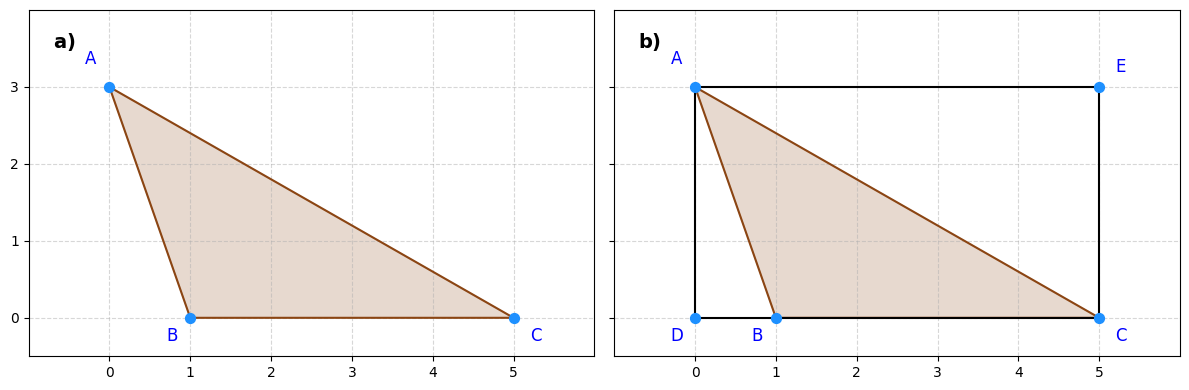

In [ ]:

# Crear figura y ejes (2 subplots)
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# --- Definir vértices del triángulo ---
A = (0, 3)
B = (1, 0)
C = (5, 0)
D = (0, 0)
E = (5, 3)

# Lista de puntos extremos
puntos_extremos = [A, B, C, D, E]

# --- Subplot a: Triángulo solo ---
# Dibujar puntos extremos
for px, py in [A, B, C]:
    ax[0].scatter(px, py, color='dodgerblue', s=50, zorder=3)

# Dibujar triángulo
triangulo = np.array([A, B, C, A])
ax[0].plot(triangulo[:, 0], triangulo[:, 1], color='saddlebrown', linewidth=1.5)
ax[0].fill(triangulo[:, 0], triangulo[:, 1], color='saddlebrown', alpha=0.2)

# Etiquetas de vértices
ax[0].text(A[0]-0.3, A[1]+0.3, 'A', fontsize=12, color='blue')
ax[0].text(B[0]-0.3, B[1]-0.3, 'B', fontsize=12, color='blue')
ax[0].text(C[0]+0.2, C[1]-0.3, 'C', fontsize=12, color='blue')

# Etiqueta (a)
ax[0].text(-0.7, 3.5, r'$\mathbf{a)}$', fontsize=14)

# Configurar rejilla y límites
ax[0].set_xticks(range(0, 6))
ax[0].set_yticks(range(0, 4))
ax[0].grid(True, linestyle='--', alpha=0.5)
ax[0].set_xlim(-1, 6)
ax[0].set_ylim(-0.5, 4)

# --- Subplot b: Triángulo dentro de rectángulo ---
# Dibujar puntos extremos
for px, py in [A, B, C, D, E]:
    ax[1].scatter(px, py, color='dodgerblue', s=50, zorder=3)

# Dibujar triángulo
ax[1].plot(triangulo[:, 0], triangulo[:, 1], color='saddlebrown', linewidth=1.5)
ax[1].fill(triangulo[:, 0], triangulo[:, 1], color='saddlebrown', alpha=0.2)

# Dibujar rectángulo
rect_x = [0, 5, 5, 0, 0]
rect_y = [0, 0, 3, 3, 0]
ax[1].plot(rect_x, rect_y, color='black', linewidth=1.5)

# Etiquetas de vértices
ax[1].text(A[0]-0.3, A[1]+0.3, 'A', fontsize=12, color='blue')
ax[1].text(B[0]-0.3, B[1]-0.3, 'B', fontsize=12, color='blue')
ax[1].text(C[0]+0.2, C[1]-0.3, 'C', fontsize=12, color='blue')
ax[1].text(D[0]-0.3, D[1]-0.3, 'D', fontsize=12, color='blue')
ax[1].text(E[0]+0.2, E[1]+0.2, 'E', fontsize=12, color='blue')

# Etiqueta (b)
ax[1].text(-0.7, 3.5, r'$\mathbf{b)}$', fontsize=14)

# Configurar rejilla y límites
ax[1].set_xticks(range(0, 6))
ax[1].set_yticks(range(0, 4))
ax[1].grid(True, linestyle='--', alpha=0.5)
ax[1].set_xlim(-1, 6)
ax[1].set_ylim(-0.5, 4)

# Mostrar figura
plt.tight_layout()
plt.show()


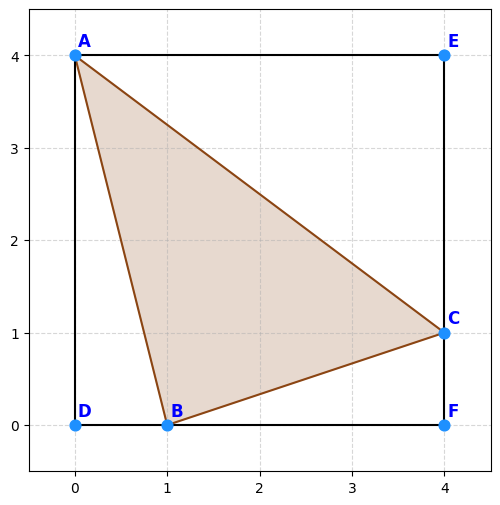

In [ ]:

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6, 6))

# --- Definir vértices del triángulo y el rectángulo ---
A = (0, 4)
B = (1, 0)
C = (4, 1)
D = (0, 0)
E = (4, 4)
F = (4, 0)

# Lista completa de puntos a dibujar
puntos_extremos = [A, B, C, D, E, F]

# --- Dibujar puntos extremos ---
for (px, py), label in zip(puntos_extremos, ['A', 'B', 'C', 'D', 'E', 'F']):
    ax.scatter(px, py, color='dodgerblue', s=60, zorder=3)
    ax.text(px+0.1, py+0.1, label, fontsize=12, color='blue', weight='bold', ha='center')

# --- Dibujar triángulo ---
triangulo = np.array([A, B, C, A])
ax.plot(triangulo[:, 0], triangulo[:, 1], color='saddlebrown', linewidth=1.5)
ax.fill(triangulo[:, 0], triangulo[:, 1], color='saddlebrown', alpha=0.2)

# --- Dibujar rectángulo ---
rect_x = [0, 4, 4, 0, 0]
rect_y = [0, 0, 4, 4, 0]
ax.plot(rect_x, rect_y, color='black', linewidth=1.5)

# --- Configurar rejilla y límites ---
ax.set_xticks(range(0, 5))
ax.set_yticks(range(0, 5))
ax.grid(True, linestyle='--', alpha=0.5)

ax.set_xlim(-0.5, 4.5)
ax.set_ylim(-0.5, 4.5)
ax.set_aspect('equal', adjustable='box')

# Mostrar figura
plt.show()


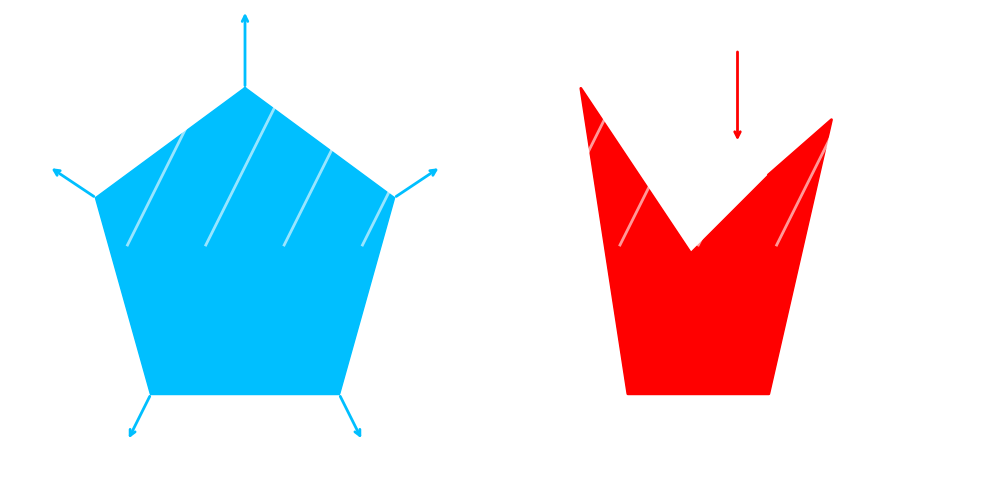

In [ ]:

# Crear figura
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# === PENTÁGONO AZUL REGULAR ===

# Vértices de un pentágono regular centrado
pentagon = np.array([
    [0, 2], [-1.9, 0.6], [-1.2, -1.9], [1.2, -1.9], [1.9, 0.6], [0, 2]
])

# Dibujar pentágono azul
ax[0].fill(pentagon[:, 0], pentagon[:, 1], color='deepskyblue')

# Dibujar contorno
ax[0].plot(pentagon[:, 0], pentagon[:, 1], color='deepskyblue', linewidth=2)

# Flechas de expansión (desde cada vértice)
arrows = [
    ([0, 2], [0, 3]),
    ([-1.9, 0.6], [-2.5, 1]),
    ([-1.2, -1.9], [-1.5, -2.5]),
    ([1.2, -1.9], [1.5, -2.5]),
    ([1.9, 0.6], [2.5, 1])
]

for start, end in arrows:
    ax[0].annotate('', xy=end, xytext=start,
                   arrowprops=dict(facecolor='deepskyblue', edgecolor='deepskyblue', arrowstyle='->', lw=2))

# === POLÍGONO ROJO CÓNCAVO ===

concave = np.array([
    [-0.6, -0.1], [-2.0, 2], [-1.4, -1.9], [0.4, -1.9], [1.2, 1.6], [0.4, 0.9]
])

# Dibujar polígono cóncavo rojo
ax[1].fill(concave[:, 0], concave[:, 1], color='red')

# Dibujar contorno
ax[1].plot(concave[:, 0], concave[:, 1], color='red', linewidth=2)

# Flecha de contracción (apuntando hacia el centro superior)
ax[1].annotate('', xy=(0, 1.3), xytext=(0, 2.5),
               arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='->', lw=2))

# === Patrón interno (huellas o líneas diagonales) ===
def draw_chevrons(ax, color):
    for x in np.linspace(-2, 2, 5):
        ax.plot([x-0.5, x+0.5], [0, 2], color='white', lw=2, alpha=0.6)

draw_chevrons(ax[0], 'deepskyblue')
draw_chevrons(ax[1], 'red')

# Configuración general
for axis in ax:
    axis.set_xlim(-3, 3)
    axis.set_ylim(-3, 3)
    axis.set_aspect('equal')
    axis.axis('off')

# Mostrar figura
plt.tight_layout()
plt.show()


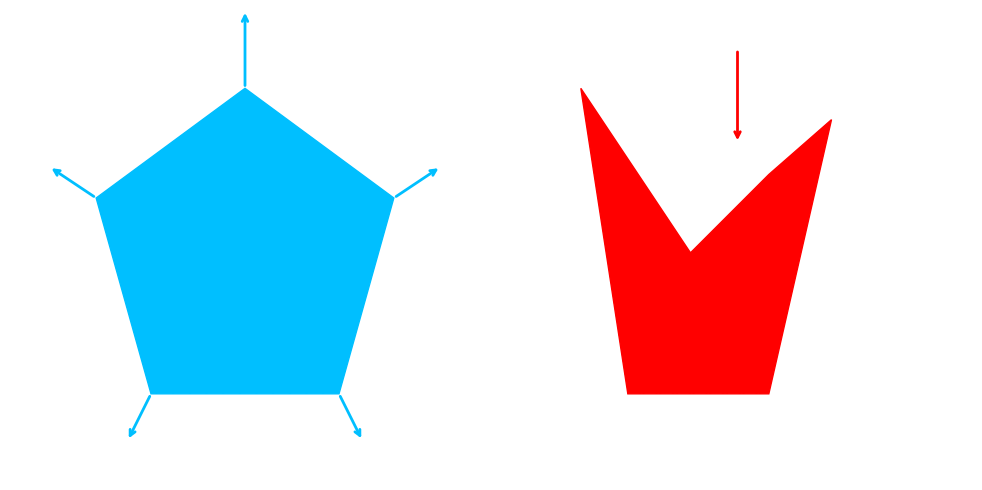

In [ ]:

# Crear figura
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# === PENTÁGONO AZUL REGULAR ===

pentagon = np.array([
    [0, 2], [-1.9, 0.6], [-1.2, -1.9], [1.2, -1.9], [1.9, 0.6], [0, 2]
])

# Pentágono azul con textura (hatch)
patch1 = patches.Polygon(pentagon, closed=True, facecolor='deepskyblue', edgecolor='deepskyblue', hatch='//')
ax[0].add_patch(patch1)

# Flechas de expansión
arrows = [
    ([0, 2], [0, 3]),
    ([-1.9, 0.6], [-2.5, 1]),
    ([-1.2, -1.9], [-1.5, -2.5]),
    ([1.2, -1.9], [1.5, -2.5]),
    ([1.9, 0.6], [2.5, 1])
]
for start, end in arrows:
    ax[0].annotate('', xy=end, xytext=start,
                   arrowprops=dict(facecolor='deepskyblue', edgecolor='deepskyblue', arrowstyle='->', lw=2))

# === POLÍGONO ROJO CÓNCAVO ===

concave = np.array([
    [-0.6, -0.1], [-2.0, 2], [-1.4, -1.9], [0.4, -1.9], [1.2, 1.6], [0.4, 0.9]
])

# Polígono rojo cóncavo con textura (hatch)
patch2 = patches.Polygon(concave, closed=True, facecolor='red', edgecolor='red', hatch='xx')
ax[1].add_patch(patch2)

# Flecha de contracción
ax[1].annotate('', xy=(0, 1.3), xytext=(0, 2.5),
               arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='->', lw=2))

# Configuración general
for axis in ax:
    axis.set_xlim(-3, 3)
    axis.set_ylim(-3, 3)
    axis.set_aspect('equal')
    axis.axis('off')

# Mostrar figura
plt.tight_layout()
plt.show()


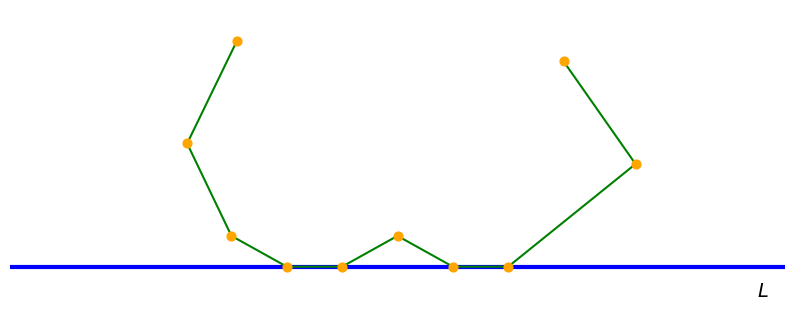

In [ ]:

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 4))

# --- Definir los puntos del polígono (vértices) ---
vertices = [
     (3.1, 2.2), (2.2, 1.2), (3, 0.3), (4, 0),  # Primera parte (sube)
    (5, 0), (6, 0.3), (7, 0),  # Triángulo central
    (8, 0), (10.3, 1), (9, 2)  # Segunda parte (sube y baja)
]

# Extraer coordenadas x e y para el plot
x, y = zip(*vertices)

# --- Dibujar la línea base L ---
ax.plot([-1, 13], [0, 0], color='blue', linewidth=3)

# --- Dibujar el polígono ---
ax.plot(x, y, color='green', linewidth=1.5)

# --- Dibujar los puntos (vértices) ---
ax.scatter(x, y, color='orange', s=40, zorder=5)

# --- Etiqueta "L" al final de la línea base ---
ax.text(12.5, -0.3, r'$L$', fontsize=14, color='black')

# --- Configuraciones estéticas ---
ax.set_xlim(-1, 13)
ax.set_ylim(-0.5, 2.5)
ax.axis('off')  # Oculta ejes

# Mostrar figura
plt.show()


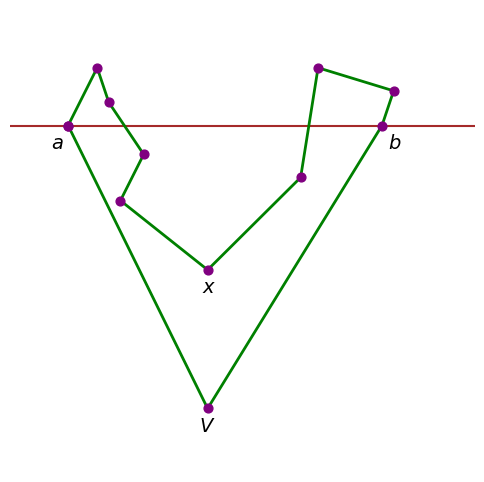

In [ ]:


# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6, 6))

# --- Definir los puntos del polígono (vértices) ---
vertices = [
    (-3, 1), (-2.5, 2), (-2.3, 1.4), (-1.7, 0.5), (-2.1, -0.3), (-0.6, -1.5),  # Izquierda bajando
    (1, 0.1), (1.3, 2), (2.6, 1.6), (2.4, 1), (-0.6, -3.9),  # Derecha subiendo
    (-3, 1)  # Vértice inferior V
]

# Extraer coordenadas x e y para el plot
x, y = zip(*vertices)

# --- Dibujar la línea base ---
ax.plot([-4, 4], [1, 1], color='brown', linewidth=1.5)

# --- Dibujar el polígono ---
ax.plot(x, y, color='green', linewidth=2)

# --- Dibujar los puntos (vértices) ---
ax.scatter(x, y, color='purple', s=40, zorder=3)

# --- Etiquetas a, b, x y V ---
ax.text(-3.3, 0.6, r'$a$', fontsize=14)
ax.text(2.5, 0.6, r'$b$', fontsize=14)
ax.text(-0.7, -1.9, r'$x$', fontsize=14)
ax.text(-0.6, -4.3, r'$V$', fontsize=14, ha='center')

# --- Configuraciones estéticas ---
ax.set_xlim(-4, 4)
ax.set_ylim(-5, 3)
ax.axis('off')  # Ocultar ejes

# Mostrar figura
plt.show()


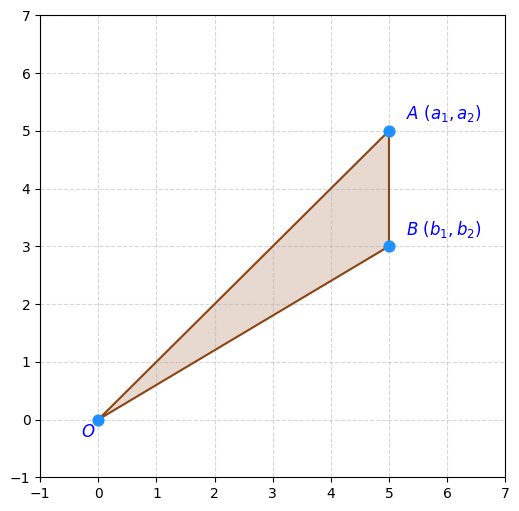

In [ ]:


# Definir los vértices del triángulo
O = (0, 0)
A = (5, 5)   # Coordenadas de A (a1, a2)
B = (5, 3)   # Coordenadas de B (b1, b2)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6, 6))

# Dibujar el triángulo
x = [O[0], A[0], B[0], O[0]]
y = [O[1], A[1], B[1], O[1]]

ax.plot(x, y, color='saddlebrown', linewidth=1.5)
ax.fill(x, y, color='saddlebrown', alpha=0.2)

# Dibujar puntos de los vértices
for point, label, offset in [(O, r'$O$', (-0.3, -0.3)),
                             (A, r'$A\ (a_1, a_2)$', (0.3, 0.2)),
                             (B, r'$B\ (b_1, b_2)$', (0.3, 0.2))]:
    ax.scatter(point[0], point[1], color='dodgerblue', s=60, zorder=3)
    ax.text(point[0]+offset[0], point[1]+offset[1], label, fontsize=12, color='blue')

# Configurar rejilla y ejes
ax.set_xticks(range(0, 7))
ax.set_yticks(range(0, 7))
ax.grid(True, linestyle='--', alpha=0.5)

ax.set_xlim(-1, 7)
ax.set_ylim(-1, 7)

# Mostrar figura
plt.show()


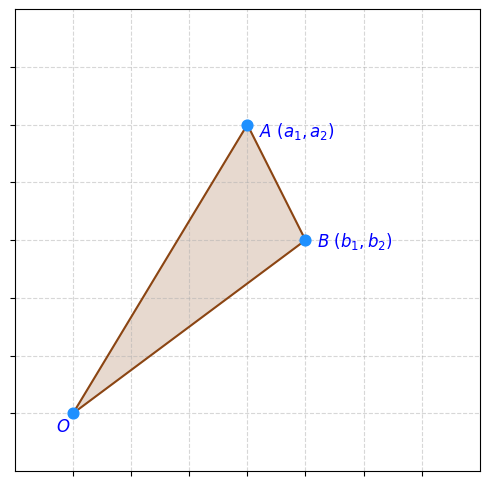

In [ ]:


# Definir los vértices del triángulo
O = (0, 0)
A = (3, 5)   # Coordenadas de A (a1, a2)
B = (4, 3)   # Coordenadas de B (b1, b2)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6, 6))

# Dibujar el triángulo
x = [O[0], A[0], B[0], O[0]]
y = [O[1], A[1], B[1], O[1]]

ax.plot(x, y, color='saddlebrown', linewidth=1.5)
ax.fill(x, y, color='saddlebrown', alpha=0.2)

# Dibujar puntos de los vértices
for point, label, offset in [(O, r'$O$', (-0.3, -0.3)),
                             (A, r'$A\ (a_1, a_2)$', (0.2, -0.2)),
                             (B, r'$B\ (b_1, b_2)$', (0.2, -0.1))]:
    ax.scatter(point[0], point[1], color='dodgerblue', s=60, zorder=3)
    ax.text(point[0]+offset[0], point[1]+offset[1], label, fontsize=12, color='blue')

# Configurar rejilla (sin etiquetas)
ax.set_xticks(range(0, 7))
ax.set_yticks(range(0, 7))
ax.grid(True, linestyle='--', alpha=0.5)

# Eliminar etiquetas (números) de los ejes
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_xlim(-1, 7)
ax.set_ylim(-1, 7)

# Mostrar figura
plt.show()


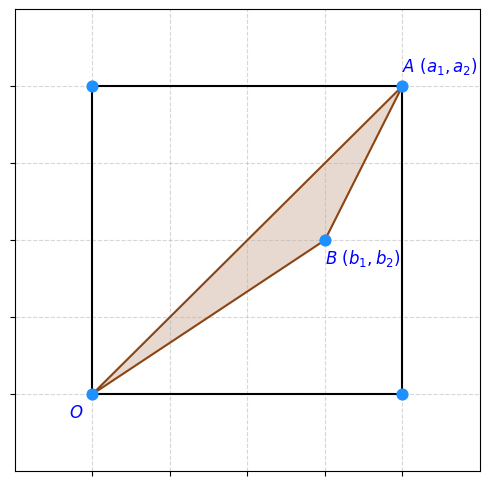

In [ ]:


# Definir vértices
O = (0, 0)
A = (4, 4)   # Coordenadas de A (a1, a2)
B = (3, 2)   # Coordenadas de B (b1, b2)
C = (4, 0)   # Punto extremo en x
D = (0, 4)   # Punto extremo en y

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6, 6))

# Dibujar rectángulo que encierra al triángulo
rect_x = [0, 4, 4, 0, 0]
rect_y = [0, 0, 4, 4, 0]
ax.plot(rect_x, rect_y, color='black', linewidth=1.5)

# Dibujar triángulo
x = [O[0], A[0], B[0], O[0]]
y = [O[1], A[1], B[1], O[1]]
ax.plot(x, y, color='saddlebrown', linewidth=1.5)
ax.fill(x, y, color='saddlebrown', alpha=0.2)

# Dibujar puntos vértices
for point, label, offset in [(O, r'$O$', (-0.3, -0.3)),
                             (A, r'$A\ (a_1, a_2)$', (0, 0.2)),
                             (B, r'$B\ (b_1, b_2)$', (0, -0.3)),
                             (C, '', (0, 0)),
                             (D, '', (0, 0))]:
    ax.scatter(point[0], point[1], color='dodgerblue', s=60, zorder=3)
    if label:
        ax.text(point[0]+offset[0], point[1]+offset[1], label, fontsize=12, color='blue')

# Configurar rejilla (sin etiquetas numéricas)
ax.set_xticks(range(0, 5))
ax.set_yticks(range(0, 5))
ax.grid(True, linestyle='--', alpha=0.5)

ax.set_xticklabels([])
ax.set_yticklabels([])

# Limites
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)

# Mostrar figura
plt.show()


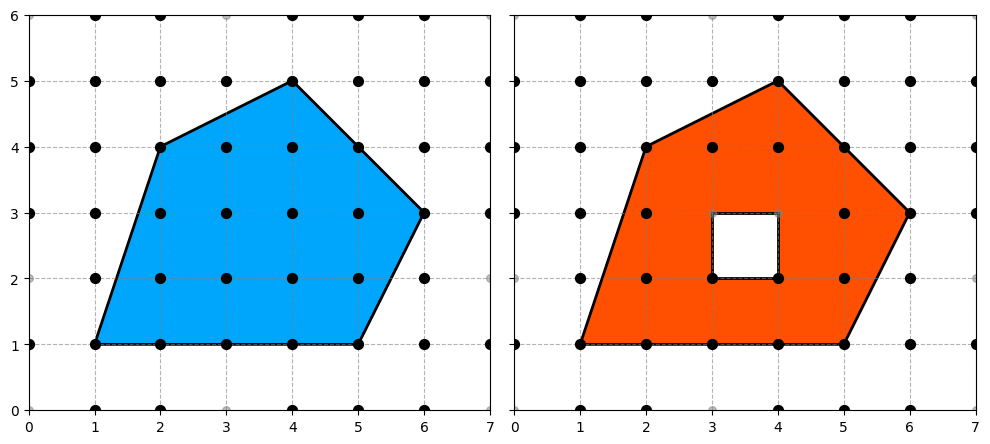

In [ ]:

# === COORDENADAS PARA LOS POLÍGONOS ===
# Polígono sin agujero
poligono_sin_agujero = np.array([
    [1, 1], [5, 1], [6, 3], [4, 5], [2, 4]
])

# Polígono con agujero
poligono_con_agujero = np.array([
    [1, 1], [5, 1], [6, 3], [4, 5], [2, 4]
])

# Agujero en el segundo polígono
agujero = np.array([
    [3, 2], [4, 2], [4, 3], [3, 3]
])

# === CREACIÓN DE LA FIGURA ===
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

# === POLÍGONO SIN AGUJERO ===
poligono1_path = Path(poligono_sin_agujero)
polygon1 = patches.Polygon(poligono_sin_agujero, closed=True, facecolor='#00A6FB', edgecolor='black', linewidth=2)
ax[0].add_patch(polygon1)

# === POLÍGONO CON AGUJERO ===
poligono2_path = Path(poligono_con_agujero)
agujero_path = Path(agujero)
polygon2 = patches.Polygon(poligono_con_agujero, closed=True, facecolor='#FF4F00', edgecolor='black', linewidth=2)
hole = patches.Polygon(agujero, closed=True, facecolor='white', edgecolor='black', linewidth=2)
ax[1].add_patch(polygon2)
ax[1].add_patch(hole)

# === MARCAR TODOS LOS PUNTOS ENTEROS DENTRO Y EN LOS BORDES ===
x_range = np.arange(0, 8, 1)
y_range = np.arange(0, 7, 1)

for x in x_range:
    for y in y_range:
        point = (x, y)
        # Marcar TODOS los puntos en gris como referencia
        ax[0].scatter(x, y, color='gray', s=30, alpha=0.5, zorder=2)
        ax[1].scatter(x, y, color='gray', s=30, alpha=0.5, zorder=2)
        # Resaltar los puntos dentro del polígono sin agujero
        if poligono1_path.contains_point(point) or point in poligono_sin_agujero:
            ax[0].scatter(x, y, color='black', s=50, zorder=3)
        # Resaltar los puntos dentro del polígono con agujero (incluyendo bordes)
        if (poligono2_path.contains_point(point) or point in poligono_con_agujero) and not agujero_path.contains_point(point):
            ax[1].scatter(x, y, color='black', s=50, zorder=3)

# === CONFIGURACIÓN DEL GRÁFICO ===
for axis in ax:
    axis.set_xlim(0, 7)
    axis.set_ylim(0, 6)
    axis.set_xticks(np.arange(0, 8, 1))
    axis.set_yticks(np.arange(0, 7, 1))
    axis.grid(True, linestyle='--', color='gray', alpha=0.6)  # Cuadrícula estética
    axis.set_aspect('equal')  # Mantener proporciones
    axis.axis('on')  # Mostrar ejes sin etiquetas

# Agregar títulos


# Mostrar figura
plt.tight_layout()
plt.show()
